<a href="https://colab.research.google.com/github/himanshu911/generative-AI-experiments/blob/main/stable_doodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uq diffusers transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.2 MB/s eta 0:00:00


In [ ]:
!huggingface-cli login --token "your_huggingface_token"

In [3]:
import logging
logging.disable(logging.WARNING)

from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
from fastcore.all import concat
from PIL import Image

torch.manual_seed(1)

0it [00:00, ?it/s]

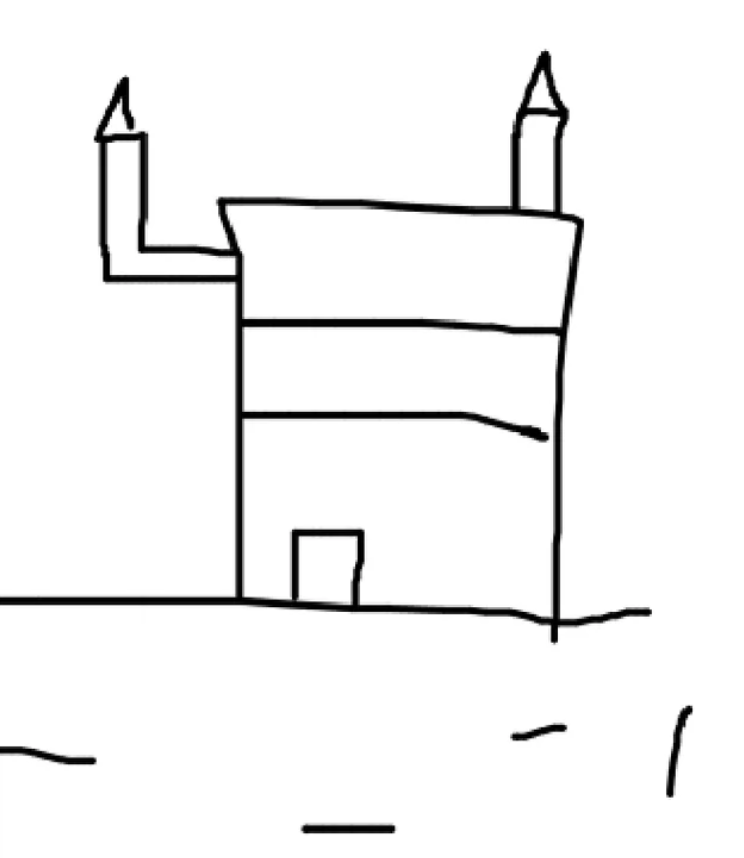

In [4]:
prompt = 'castle in snow mountain, photorealistic 4K, highly detailed'

init_image = Image.open('/path/to/doodle.png').convert("RGB")
init_image

In [ ]:
pipe_i2i = StableDiffusionXLImg2ImgPipeline.from_pretrained('stabilityai/stable-diffusion-xl-base-1.0', torch_dtype=torch.float16)
# pipe_i2i = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)
pipe_i2i = pipe_i2i.to("cuda")

  0%|          | 0/82 [00:00<?, ?it/s]

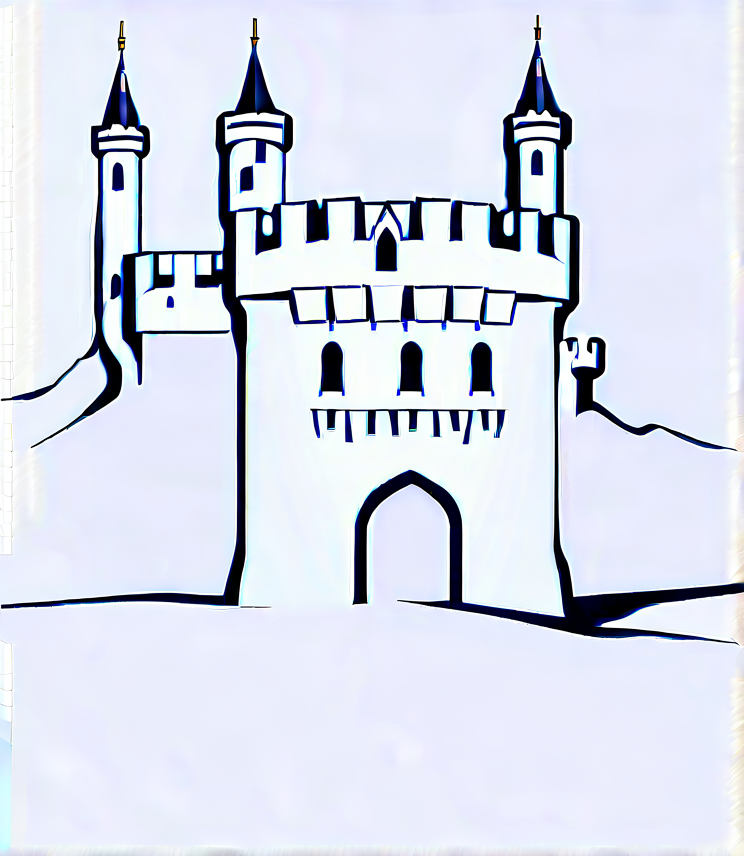

In [10]:
torch.manual_seed(1)
prompt = 'castle in snow mountain, photorealistic 4K, highly detailed'

image0 = pipe_i2i(prompt=prompt, image=init_image, strength=0.82, negative_prompt='text',
                 guidance_scale=70,
                 num_inference_steps=100).images[0]
image0

  0%|          | 0/82 [00:00<?, ?it/s]

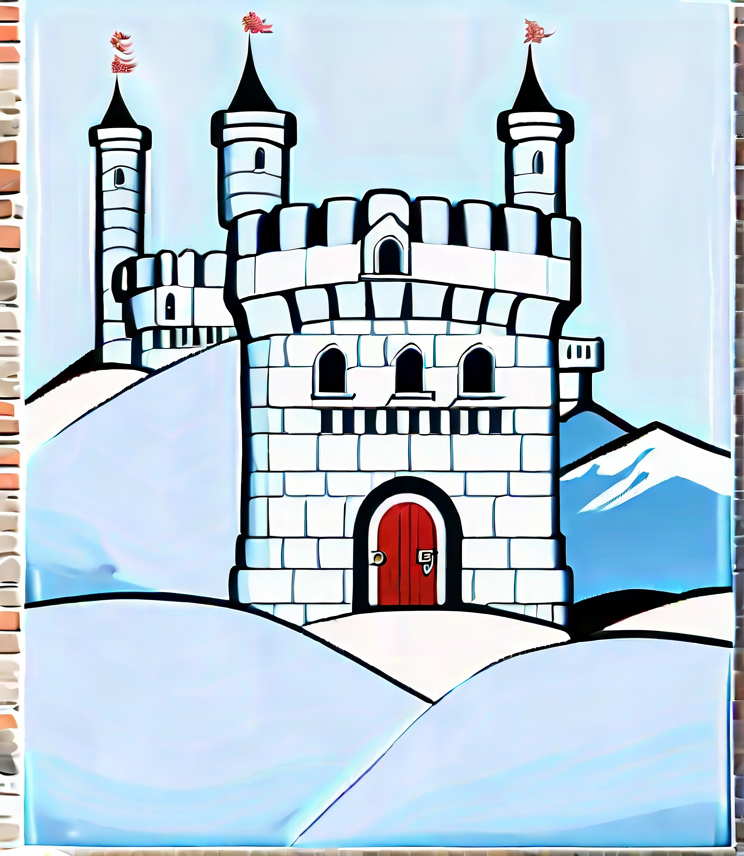

In [7]:
torch.manual_seed(1)
prompt = 'a brick wall castle with a big red door and three domes, on top of a snow mountain, clear sky, photorealistic 4K, highly detailed'

image = pipe_i2i(prompt=prompt, image=image0, strength=0.82, negative_prompt='text, circle',
                 guidance_scale=70,
                 num_inference_steps=100).images[0]
image